In [ ]:
Una agencia de publicidad quiere identificar los territorios en los que Youtube ha tenido mayor penetración, y también aquellos países que muestran promesa en crecer el número de usuarios. Todo esto con el objetivo de identificar nuevos mercados.

In [1]:
#Se importan las librerias
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Se inicia sesion de spark
spark = SparkSession.builder.appName('Youtube').getOrCreate()

In [3]:
#Se crea el df
df = spark.read.json('hdfs://namenode:8020/user/hadoop/youtube2025.json', multiLine=True)

In [5]:
df.printSchema()

root
 |-- YouTubeUsersJuly2023: double (nullable = true)
 |-- YouTubeUsersPenetrationJuly2023: double (nullable = true)
 |-- YouTubeUsers_Penetration_Pct_2024Feb: double (nullable = true)
 |-- YouTubeUsers_TotalUsers_Num_2024Feb: long (nullable = true)
 |-- country: string (nullable = true)
 |-- flagCode: string (nullable = true)



In [23]:
df.show()

+--------------------+-------------------------------+------------------------------------+-----------------------------------+--------------+--------+
|YouTubeUsersJuly2023|YouTubeUsersPenetrationJuly2023|YouTubeUsers_Penetration_Pct_2024Feb|YouTubeUsers_TotalUsers_Num_2024Feb|       country|flagCode|
+--------------------+-------------------------------+------------------------------------+-----------------------------------+--------------+--------+
|               467.0|                           36.2|                                61.5|                          462000000|         India|      IN|
|               246.0|                           78.3|                                72.2|                          239000000| United States|      US|
|               142.0|                           72.9|                                76.6|                          144000000|        Brazil|      BR|
|               139.0|                           55.0|                                75

In [7]:
pdf = df.toPandas()

In [8]:
pdf.head()

,YouTubeUsersJuly2023,YouTubeUsersPenetrationJuly2023,YouTubeUsers_Penetration_Pct_2024Feb,YouTubeUsers_TotalUsers_Num_2024Feb,country,flagCode
0,467.0,36.2,61.5,462000000,India,IN
1,246.0,78.3,72.2,239000000,United States,US
2,142.0,72.9,76.6,144000000,Brazil,BR
3,139.0,55.0,75.0,139000000,Indonesia,ID
4,81.8,71.1,77.5,83100000,Mexico,MX


In [24]:
#Se muestra los 5 paises con mayor numero de usuarios registrados desde Febrero 2024
tot_usuarios = pdf.sort_values(by='YouTubeUsers_TotalUsers_Num_2024Feb', ascending=False)
print(tot_usuarios[['country', 'YouTubeUsers_TotalUsers_Num_2024Feb']].head())

         country  YouTubeUsers_TotalUsers_Num_2024Feb
0          India                            462000000
1  United States                            239000000
2         Brazil                            144000000
3      Indonesia                            139000000
4         Mexico                             83100000


In [25]:
#De esos 5 paises, se calcula la penetracion
top_5 = pdf.sort_values(by='YouTubeUsers_TotalUsers_Num_2024Feb', ascending=False).head()
print(top_5[['country', 'YouTubeUsers_Penetration_Pct_2024Feb']])

         country  YouTubeUsers_Penetration_Pct_2024Feb
0          India                                  61.5
1  United States                                  72.2
2         Brazil                                  76.6
3      Indonesia                                  75.0
4         Mexico                                  77.5


Aunque India es el país con el mayor número de usuarios, se ha registrado mayor penetración en México.
En el caso de India, la agencia de publicidad se debe enfocar en crear campañas que busquen adquirir nuevos usuarios, ya sea por utilizando referencias culturales que sean relevantes al público general. Y para México, la mayor penetración significa que Youtube es una plataforma muy influyente y con un alcance significativo.
Por lo que México es un territorio idoneo para las empresas a presentar nuevos productos que no hayan sacado en otros mercados.

In [31]:
#Se calcula el número de usuarios en julio de 2023
pdf['YouTubeUsersJuly2023_Num'] = pdf['YouTubeUsersJuly2023'] * 1000000

#Se calcula el crecimiento de usuarios
pdf['UserGrowth'] = pdf['YouTubeUsers_TotalUsers_Num_2024Feb'] - pdf['YouTubeUsersJuly2023_Num']

#Se calcula el crecimiento relativo (en porcentaje)
pdf['GrowthPercentage'] = (pdf['UserGrowth'] / pdf['YouTubeUsersJuly2023_Num']) * 100

#Se ordena por crecimiento absoluto para ver los mercados con mayor aumento en número de usuarios
crec_abs = pdf.sort_values(by='UserGrowth', ascending=False)

#Se ordena por crecimiento relativo para ver los mercados con mayor aumento porcentual
aumento = pdf.sort_values(by='GrowthPercentage', ascending=False)

/tmp/ipykernel_62610/2106899199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='UserGrowth', data=crec_abs.head(10), palette='viridis')


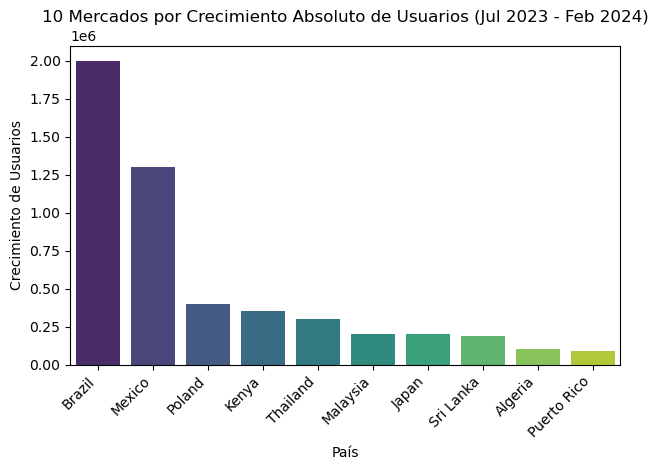

/tmp/ipykernel_62610/2106899199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='GrowthPercentage', data=aumento.head(10), palette='mako')


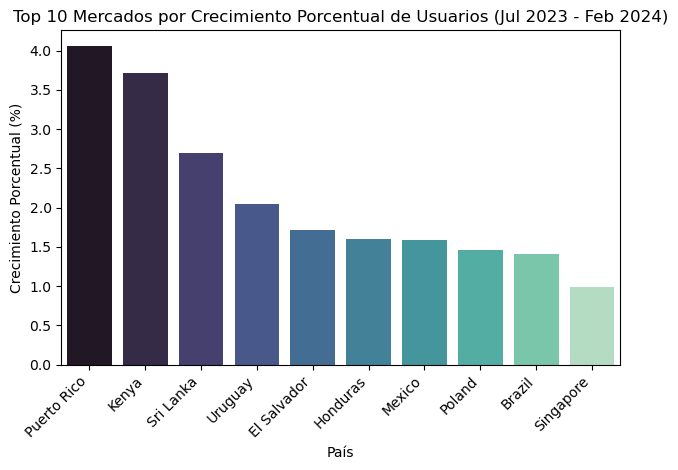

In [30]:
# Gráfico de crecimiento absoluto
sns.barplot(x='country', y='UserGrowth', data=crec_abs.head(10), palette='viridis')
plt.title('10 Mercados por Crecimiento Absoluto de Usuarios (Jul 2023 - Feb 2024)')
plt.xlabel('País')
plt.ylabel('Crecimiento de Usuarios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de crecimiento porcentual
sns.barplot(x='country', y='GrowthPercentage', data=aumento.head(10), palette='mako')
plt.title('Top 10 Mercados por Crecimiento Porcentual de Usuarios (Jul 2023 - Feb 2024)')
plt.xlabel('País')
plt.ylabel('Crecimiento Porcentual (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Puerto Rico, Kenia y Sri Lanka lideraron en términos de la mayor proporción de crecimiento de su base de usuarios, sugiriendo una rápida adopción relativa en estos mercados. Ya que estos territorios son "virgenes", es importante establecer temprano una marca mientras que la base de usuarios sigue expandiéndose.